In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_train = pd.read_csv('C:/Users/srija/Documents/DS_Job_Salary_Predictor/data/train.csv')

In [3]:
df_train.head()

,S.no,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,260,BI & Platform Analytics Manager,$85K-$134K (Glassdoor est.),A collective energy and ambition. A place wher...,3.4,Church & Dwight\n3.4,"Ewing, NJ","Ewing, NJ",1001 to 5000 employees,1846,Company - Public,Consumer Products Manufacturing,Manufacturing,$2 to $5 billion (USD),-1,1
1,257,Medical Technologist / Clinical Laboratory Sci...,$15-$25 Per Hour(Glassdoor est.),The incumbent performs a broad range of labora...,3.4,"Veterans Affairs, Veterans Health Administrati...","New Orleans, LA","Washington, DC",10000+ employees,1930,Government,Federal Agencies,Government,Unknown / Non-Applicable,-1,1
2,12,Staff Data Scientist - Technology,$106K-$172K (Glassdoor est.),Position Summary...\nDrives the execution of m...,3.2,Walmart\n3.2,"Plano, TX","Bentonville, AR",10000+ employees,1962,Company - Public,"Department, Clothing, & Shoe Stores",Retail,$10+ billion (USD),"Target, Costco Wholesale, Amazon",1
3,293,Data Scientist,$74K-$119K (Glassdoor est.),Job Description\n\n\nJob Title: Data Scientist...,2.5,comScore\n2.5,"Portland, OR","Reston, VA",1001 to 5000 employees,1999,Company - Public,Advertising & Marketing,Business Services,$1 to $2 billion (USD),"Nielsen, Hitwise, Coremetrics",0
4,632,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),-1,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.no               764 non-null    int64  
 1   Job Title          764 non-null    object 
 2   Salary Estimate    764 non-null    object 
 3   Job Description    764 non-null    object 
 4   Rating             764 non-null    float64
 5   Company Name       764 non-null    object 
 6   Location           764 non-null    object 
 7   Headquarters       764 non-null    object 
 8   Size               764 non-null    object 
 9   Founded            764 non-null    int64  
 10  Type of ownership  764 non-null    object 
 11  Industry           764 non-null    object 
 12  Sector             764 non-null    object 
 13  Revenue            764 non-null    object 
 14  Competitors        764 non-null    object 
 15  Easy Apply         764 non-null    int64  
dtypes: float64(1), int64(3), o

In [5]:
df_train.drop(['S.no'],inplace=True,axis=1)

In [6]:
df_train.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [7]:
## Job Title

df_train['Job Title'].value_counts()

Job Title
Data Scientist                                                                                                                         143
Data Engineer                                                                                                                           51
Senior Data Scientist                                                                                                                   33
Senior Data Engineer                                                                                                                    13
Data Analyst                                                                                                                            13
Business Intelligence Analyst                                                                                                           13
Senior Data Analyst                                                                                                                      9
Machine Learning 

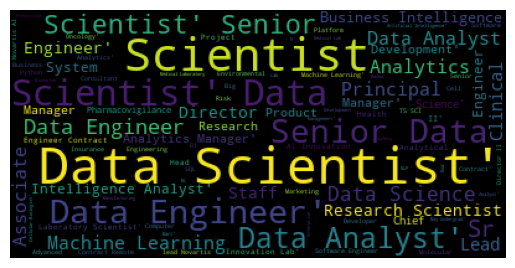

In [8]:
from wordcloud import WordCloud, STOPWORDS

text = df_train['Job Title'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [9]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' or 'analytics' or 'business' or 'intelligence' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engg'
    else:
        return 'na'
    
df_train['Job Title simp'] = df_train['Job Title'].apply(title_simplifier)

In [10]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() :
            return 'senior'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower() or 'principal' in title.lower():
        return 'director'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'staff' in title.lower():
        return 'jr'
    else:
        return 'na'
    
df_train['Job Seniority'] = df_train['Job Title'].apply(seniority)

In [11]:
df_train.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Job Title simp,Job Seniority
0,BI & Platform Analytics Manager,$85K-$134K (Glassdoor est.),A collective energy and ambition. A place wher...,3.4,Church & Dwight\n3.4,"Ewing, NJ","Ewing, NJ",1001 to 5000 employees,1846,Company - Public,Consumer Products Manufacturing,Manufacturing,$2 to $5 billion (USD),-1,1,data analyst,manager
1,Medical Technologist / Clinical Laboratory Sci...,$15-$25 Per Hour(Glassdoor est.),The incumbent performs a broad range of labora...,3.4,"Veterans Affairs, Veterans Health Administrati...","New Orleans, LA","Washington, DC",10000+ employees,1930,Government,Federal Agencies,Government,Unknown / Non-Applicable,-1,1,data analyst,na
2,Staff Data Scientist - Technology,$106K-$172K (Glassdoor est.),Position Summary...\nDrives the execution of m...,3.2,Walmart\n3.2,"Plano, TX","Bentonville, AR",10000+ employees,1962,Company - Public,"Department, Clothing, & Shoe Stores",Retail,$10+ billion (USD),"Target, Costco Wholesale, Amazon",1,data scientist,jr
3,Data Scientist,$74K-$119K (Glassdoor est.),Job Description\n\n\nJob Title: Data Scientist...,2.5,comScore\n2.5,"Portland, OR","Reston, VA",1001 to 5000 employees,1999,Company - Public,Advertising & Marketing,Business Services,$1 to $2 billion (USD),"Nielsen, Hitwise, Coremetrics",0,data scientist,na
4,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),-1,1,data analyst,na


In [12]:
## Salary Estimate

df_train['hourly'] = df_train['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df_train['employer_provided'] = df_train['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

df_train = df_train[df_train['Salary Estimate'] != '-1']
salary = df_train['Salary Estimate'].apply(lambda x: x.split('(')[0])
minus_Kd = salary.apply(lambda x: x.replace('K','').replace('$',''))

min_hr = minus_Kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

df_train['min_salary'] = min_hr.apply(lambda x: int(x.split('-')[0]))
df_train['max_salary'] = min_hr.apply(lambda x: int(x.split('-')[1]))
df_train['avg_salary'] = (df_train.min_salary+df_train.max_salary)/2

In [13]:
## Company name

df_train['company_name'] = df_train['Company Name'].apply(lambda x: x.split('\n')[0] if '\n' in x else x)

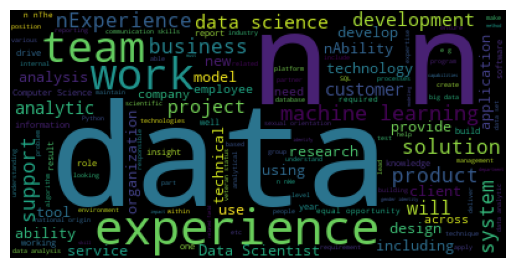

In [14]:
## job description

text = df_train['Job Description'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
## job description

#python
df_train['python_yn'] = df_train['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
 
#r studio 
df_train['R_yn'] = df_train['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

#spark 
df_train['spark'] = df_train['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

#aws 
df_train['aws'] = df_train['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

#excel
df_train['excel'] = df_train['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [16]:
## job state and headquarters

df_train['job_state'] = df_train['Location'].apply(lambda i:i.split(',')[-1])
df_train['job_headquarters'] = df_train['Headquarters'].apply(lambda i:i.split(',')[-1])

In [17]:
df_train['job_state']= df_train.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'new jersey' else 'NJ')
df_train['job_state']= df_train.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'michigan' else 'MI')
df_train['job_state']= df_train.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'oregon' else 'OR')
df_train['job_state']= df_train.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'virginia' else 'NJ')
df_train['job_state']= df_train.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'maryland' else 'MD')

df_train.drop(df_train[df_train['job_state']=='United States'].index,inplace=True)

df_train['job_state'].value_counts()

job_state
CA    117
MA     84
NY     55
VA     33
PA     31
IL     29
MD     26
TX     24
WA     17
NC     16
NJ     16
FL     13
OH     11
UT     10
CO      9
TN      9
DC      8
AL      8
IN      7
AZ      7
WI      7
MO      7
KY      5
OR      4
NE      4
CT      4
MI      4
KS      3
LA      3
NM      3
GA      3
MN      2
IA      2
DE      2
ID      1
SC      1
RI      1
Name: count, dtype: int64

In [18]:
## Sector

df_train.drop(df_train[df_train['Sector']=='-1'].index,inplace=True)
df_train['Sector'].value_counts()

Sector
Information Technology                136
Biotech & Pharmaceuticals              93
Business Services                      73
Insurance                              53
Health Care                            41
Finance                                33
Manufacturing                          26
Aerospace & Defense                    24
Education                              22
Oil, Gas, Energy & Utilities           14
Travel & Tourism                        8
Non-Profit                              8
Retail                                  8
Government                              6
Real Estate                             6
Media                                   5
Telecommunications                      5
Consumer Services                       4
Transportation & Logistics              3
Mining & Metals                         3
Arts, Entertainment & Recreation        2
Construction, Repair & Maintenance      2
Accounting & Legal                      1
Agriculture & Forestry     

In [19]:
## Founded

df_train['age of company'] = 2023-df_train['Founded']

In [20]:
## Size

df_train.drop(df_train[df_train['Size']=='-1'].index,inplace=True)
df_train['Size'].value_counts()

Size
1001 to 5000 employees     119
501 to 1000 employees      114
10000+ employees           104
201 to 500 employees        84
51 to 200 employees         72
5001 to 10000 employees     60
1 to 50 employees           23
Unknown                      1
Name: count, dtype: int64

In [21]:
## competitors

df_train['Competitors'].value_counts()

Competitors
-1                                                                                              357
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Novartis, Baxter, Pfizer                                                                         11
Travelers, Allstate, State Farm                                                                   8
Expedia Group, Orbitz Worldwide, Priceline.com                                                    7
Leidos, CACI International, Booz Allen Hamilton                                                   6
Roche, GlaxoSmithKline, Novartis                                                                  5
Pitney Bowes                                                                                      5
Battelle, General Atomics, SAIC                                                                   4
See Tickets, TicketWeb, Vendini                                                         

In [22]:
df_train['num_comp'] = df_train['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [23]:
df_train['num_comp'].value_counts()

num_comp
0    357
3    175
2     34
1     10
4      1
Name: count, dtype: int64

In [24]:
## Revenue

df_train.drop(df_train[df_train['Revenue']=='-1'].index,inplace=True)
df_train['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            155
$10+ billion (USD)                   96
$100 to $500 million (USD)           65
$1 to $2 billion (USD)               50
$500 million to $1 billion (USD)     50
$50 to $100 million (USD)            37
$2 to $5 billion (USD)               30
$25 to $50 million (USD)             28
$10 to $25 million (USD)             23
$5 to $10 billion (USD)              16
$5 to $10 million (USD)              16
$1 to $5 million (USD)                8
Less than $1 million (USD)            3
Name: count, dtype: int64

In [25]:
df_train.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Job Title simp,Job Seniority,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name,python_yn,R_yn,spark,aws,excel,job_state,job_headquarters,age of company,num_comp
0,BI & Platform Analytics Manager,$85K-$134K (Glassdoor est.),A collective energy and ambition. A place wher...,3.4,Church & Dwight\n3.4,"Ewing, NJ","Ewing, NJ",1001 to 5000 employees,1846,Company - Public,Consumer Products Manufacturing,Manufacturing,$2 to $5 billion (USD),-1,1,data analyst,manager,0,0,85,134,109.5,Church & Dwight,1,0,0,0,1,NJ,NJ,177,0
1,Medical Technologist / Clinical Laboratory Sci...,$15-$25 Per Hour(Glassdoor est.),The incumbent performs a broad range of labora...,3.4,"Veterans Affairs, Veterans Health Administrati...","New Orleans, LA","Washington, DC",10000+ employees,1930,Government,Federal Agencies,Government,Unknown / Non-Applicable,-1,1,data analyst,na,1,0,15,25,20.0,"Veterans Affairs, Veterans Health Administration",0,0,0,0,0,LA,DC,93,0
2,Staff Data Scientist - Technology,$106K-$172K (Glassdoor est.),Position Summary...\nDrives the execution of m...,3.2,Walmart\n3.2,"Plano, TX","Bentonville, AR",10000+ employees,1962,Company - Public,"Department, Clothing, & Shoe Stores",Retail,$10+ billion (USD),"Target, Costco Wholesale, Amazon",1,data scientist,jr,0,0,106,172,139.0,Walmart,0,0,0,0,0,TX,AR,61,3
3,Data Scientist,$74K-$119K (Glassdoor est.),Job Description\n\n\nJob Title: Data Scientist...,2.5,comScore\n2.5,"Portland, OR","Reston, VA",1001 to 5000 employees,1999,Company - Public,Advertising & Marketing,Business Services,$1 to $2 billion (USD),"Nielsen, Hitwise, Coremetrics",0,data scientist,na,0,0,74,119,96.5,comScore,1,0,1,0,0,OR,VA,24,3
4,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),-1,1,data analyst,na,1,0,18,25,21.5,Texas Health Huguley Hospital,0,0,0,1,0,TX,TX,46,0


In [26]:
df_train.drop(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Location', 'Headquarters',
              'Founded', 'Competitors'],axis=1,inplace=True)

In [27]:
df_train.head()

,Rating,Size,Type of ownership,Industry,Sector,Revenue,Easy Apply,Job Title simp,Job Seniority,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name,python_yn,R_yn,spark,aws,excel,job_state,job_headquarters,age of company,num_comp
0,3.4,1001 to 5000 employees,Company - Public,Consumer Products Manufacturing,Manufacturing,$2 to $5 billion (USD),1,data analyst,manager,0,0,85,134,109.5,Church & Dwight,1,0,0,0,1,NJ,NJ,177,0
1,3.4,10000+ employees,Government,Federal Agencies,Government,Unknown / Non-Applicable,1,data analyst,na,1,0,15,25,20.0,"Veterans Affairs, Veterans Health Administration",0,0,0,0,0,LA,DC,93,0
2,3.2,10000+ employees,Company - Public,"Department, Clothing, & Shoe Stores",Retail,$10+ billion (USD),1,data scientist,jr,0,0,106,172,139.0,Walmart,0,0,0,0,0,TX,AR,61,3
3,2.5,1001 to 5000 employees,Company - Public,Advertising & Marketing,Business Services,$1 to $2 billion (USD),0,data scientist,na,0,0,74,119,96.5,comScore,1,0,1,0,0,OR,VA,24,3
4,4.0,1001 to 5000 employees,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),1,data analyst,na,1,0,18,25,21.5,Texas Health Huguley Hospital,0,0,0,1,0,TX,TX,46,0


In [28]:
df_train.drop(['hourly', 'employer_provided', 'min_salary', 'max_salary'],axis=1,inplace=True)

In [29]:
df_train.head()

,Rating,Size,Type of ownership,Industry,Sector,Revenue,Easy Apply,Job Title simp,Job Seniority,avg_salary,company_name,python_yn,R_yn,spark,aws,excel,job_state,job_headquarters,age of company,num_comp
0,3.4,1001 to 5000 employees,Company - Public,Consumer Products Manufacturing,Manufacturing,$2 to $5 billion (USD),1,data analyst,manager,109.5,Church & Dwight,1,0,0,0,1,NJ,NJ,177,0
1,3.4,10000+ employees,Government,Federal Agencies,Government,Unknown / Non-Applicable,1,data analyst,na,20.0,"Veterans Affairs, Veterans Health Administration",0,0,0,0,0,LA,DC,93,0
2,3.2,10000+ employees,Company - Public,"Department, Clothing, & Shoe Stores",Retail,$10+ billion (USD),1,data scientist,jr,139.0,Walmart,0,0,0,0,0,TX,AR,61,3
3,2.5,1001 to 5000 employees,Company - Public,Advertising & Marketing,Business Services,$1 to $2 billion (USD),0,data scientist,na,96.5,comScore,1,0,1,0,0,OR,VA,24,3
4,4.0,1001 to 5000 employees,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),1,data analyst,na,21.5,Texas Health Huguley Hospital,0,0,0,1,0,TX,TX,46,0


In [31]:
df_train.to_csv('C:/Users/srija/Documents/DS_Job_Salary_Predictor/data/clean_data.csv',index=False)